#Student Name: Cormac Lavery
#Student ID: 16139658

Experiment summary:
At a given casino where all bets are at a normally distributed random odds and for a normally distributed random amount what is the least number of bets less than 200 where they will make a profit 75% of the time


In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

In [42]:
def calculate_losses(number_bets = 10):
    '''returns the losses for a given number of bets, negative values are associated with profits'''
    mean_bet_result, std_deviation_bet_result = -0.05, 1
    mean_bet_size, std_deviation_bet_size = 100, 20
    losses = 0
    for i in range(number_bets):
        losses += (random.normalvariate(mean_bet_result, std_deviation_bet_result) * random.normalvariate(mean_bet_size, std_deviation_bet_size)) 
    return losses

number_of_observations = 1000
experiment_results = []

for bet_count in range(1, 200):
    profit = 0
    losses = 0
    profitable_days = 0
    observations = []
    for i in range(number_of_observations):
        current_profit = calculate_losses(bet_count)
        observations.append(current_profit)
        if current_profit < 0:
            profit -= current_profit
            profitable_days += 1
        else:
            losses += current_profit
    experiment_results.append((bet_count, profitable_days/number_of_observations, (profit - losses) / number_of_observations, observations))

148 bets results in a profit 75.1% of the time with average profit of 773.0916828211185 and median profit -832.3714881854469 and standard deviation of 1203.92494331439 


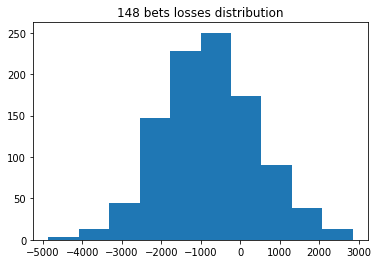

In [43]:
suitable_results = []
for result in experiment_results:
    if result[1] * 100 > 75:
        suitable_results.append(result)
least_result = suitable_results[0]

plt.title("{} bets losses distribution".format(least_result[0]))
plt.hist(least_result[3])

observations = np.array(least_result[3])
median_profit = np.median(observations)
standard_deviation_profit = np.std(observations)
print("{} bets results in a profit {}% of the time with average profit of {} and median profit {} and standard deviation of {} "
     .format(least_result[0], least_result[1] * 100, least_result[2], median_profit, standard_deviation_profit))